In [1]:
%autosave 0

Autosave disabled


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [3]:
#!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

In [13]:
#pip install "numpy<2.0"


## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [14]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

import tensorflow as tf


import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
from tensorflow.keras.preprocessing.image import load_img

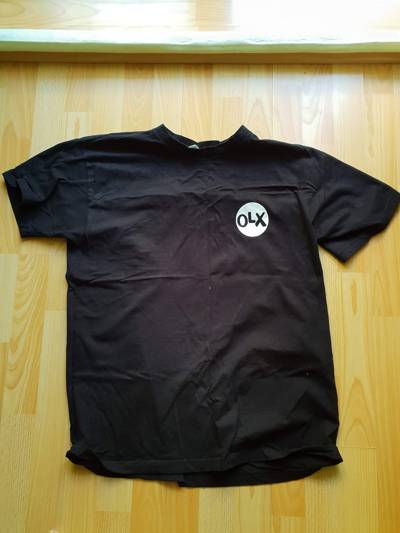

In [40]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [41]:
img = load_img(fullname, target_size=(299, 299))

In [42]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [43]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [44]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [45]:
X = np.array([x])

In [46]:
X.shape

(1, 299, 299, 3)

In [47]:
X = preprocess_input(X)

In [48]:
pred = model.predict(X)

1/1 [==============================] - 1s 625ms/step


In [49]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [52]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [53]:
X, y = next(train_ds)

In [54]:
y[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [55]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [56]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [57]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [58]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 19s 162ms/step - loss: 1.2176 - accuracy: 0.6724 - val_loss: 0.9774 - val_accuracy: 0.7302
Epoch 2/10
96/96 [==============================] - 11s 118ms/step - loss: 0.5292 - accuracy: 0.8276 - val_loss: 0.7378 - val_accuracy: 0.8065
Epoch 3/10
96/96 [==============================] - 11s 119ms/step - loss: 0.3154 - accuracy: 0.8902 - val_loss: 0.7137 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 11s 117ms/step - loss: 0.2498 - accuracy: 0.9126 - val_loss: 0.8896 - val_accuracy: 0.7918
Epoch 5/10
96/96 [==============================] - 11s 119ms/step - loss: 0.1375 - accuracy: 0.9498 - val_loss: 0.9178 - val_accuracy: 0.7918
Epoch 6/10
96/96 [==============================] - 11s 119ms/step - loss: 0.0923 - accuracy: 0.9697 - val_loss: 0.8357 - val_accuracy: 0.8123
Epoch 7/10
96/96 [==============================] - 11s 119ms/step - loss: 0.0643 - accuracy: 0.9808 - val_loss: 0.7941 - val_accuracy: 0.8270

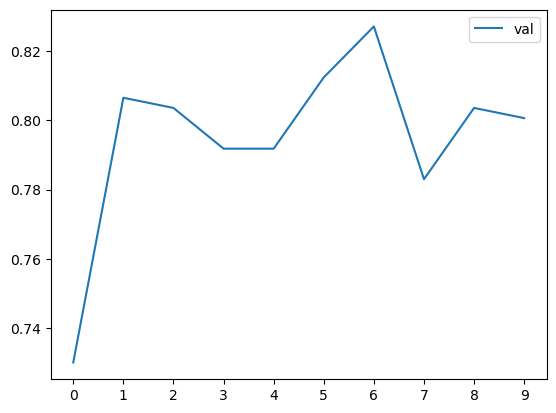

In [59]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [60]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [61]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 14s 127ms/step - loss: 1.9951 - accuracy: 0.3230 - val_loss: 1.6943 - val_accuracy: 0.4399
Epoch 2/10
96/96 [==============================] - 11s 119ms/step - loss: 1.4046 - accuracy: 0.5583 - val_loss: 1.3106 - val_accuracy: 0.5777
Epoch 3/10
96/96 [==============================] - 12s 120ms/step - loss: 1.1414 - accuracy: 0.6441 - val_loss: 1.1122 - val_accuracy: 0.6686
Epoch 4/10
96/96 [==============================] - 11s 118ms/step - loss: 0.9947 - accuracy: 0.6949 - val_loss: 0.9927 - val_accuracy: 0.6891
Epoch 5/10
96/96 [==============================] - 11s 119ms/step - loss: 0.8996 - accuracy: 0.7187 - val_loss: 0.9103 - val_accuracy: 0.7331
Epoch 6/10
96/96 [==============================] - 11s 119ms/step - loss: 0.8312 - accuracy: 0.7392 - val_loss: 0.8549 - val_accuracy: 0.7566
Epoch 7/10
96/96 [==============================] - 11s 118ms/step - loss: 0.7786 - accuracy: 0.7516 - val_loss: 0.8152 - val_accuracy:

In [62]:
del scores[0.1]
del scores[0.0001]

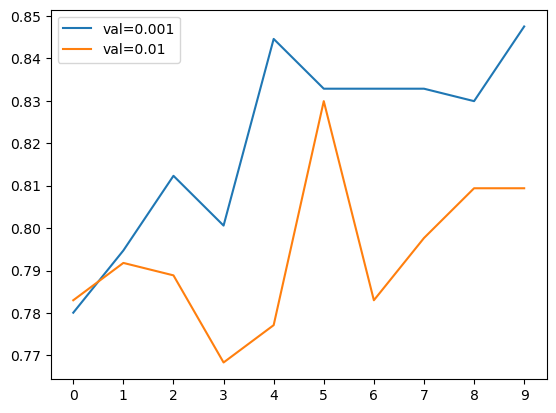

In [63]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [64]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [65]:
model.save_weights('model_v1.h5', save_format='h5')

In [66]:
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=3, val_accuracy=0.84)  # 2d means two digits  .3f mean 3 decimals

'xception_v1_03_0.840.h5'

In [67]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [68]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 [==============================] - 15s 134ms/step - loss: 1.0644 - accuracy: 0.6441 - val_loss: 0.7342 - val_accuracy: 0.7625
Epoch 2/10
96/96 [==============================] - 12s 121ms/step - loss: 0.6342 - accuracy: 0.7859 - val_loss: 0.6555 - val_accuracy: 0.7771
Epoch 3/10
96/96 [==============================] - 12s 120ms/step - loss: 0.5039 - accuracy: 0.8318 - val_loss: 0.5810 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 11s 118ms/step - loss: 0.4301 - accuracy: 0.8598 - val_loss: 0.5927 - val_accuracy: 0.8094
Epoch 5/10
96/96 [==============================] - 11s 117ms/step - loss: 0.3718 - accuracy: 0.8827 - val_loss: 0.5654 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 12s 120ms/step - loss: 0.3307 - accuracy: 0.8993 - val_loss: 0.5487 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 11s 119ms/step - loss: 0.2905 - accuracy: 0.9208 - val_loss: 0.5822 - val_accuracy: 0.8035

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [69]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [70]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 15s 130ms/step - loss: 1.5700 - accuracy: 0.4518 - val_loss: 1.2230 - val_accuracy: 0.6041
Epoch 2/10
96/96 [==============================] - 12s 120ms/step - loss: 1.0556 - accuracy: 0.6359 - val_loss: 0.9279 - val_accuracy: 0.7038
Epoch 3/10
96/96 [==============================] - 12s 120ms/step - loss: 0.7598 - accuracy: 0.7487 - val_loss: 0.7093 - val_accuracy: 0.7889
Epoch 4/10
96/96 [==============================] - 12s 120ms/step - loss: 0.5918 - accuracy: 0.8051 - val_loss: 0.6439 - val_accuracy: 0.7947
Epoch 5/10
96/96 [==============================] - 12s 121ms/step - loss: 0.4838 - accuracy: 0.8475 - val_loss: 0.6051 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 12s 121ms/step - loss: 0.4121 - accuracy: 0.8677 - val_loss: 0.6083 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 12s 121ms/step - loss: 0.3550 - accuracy: 0.8895 - val_loss: 0.5803 - val_accuracy: 0.8

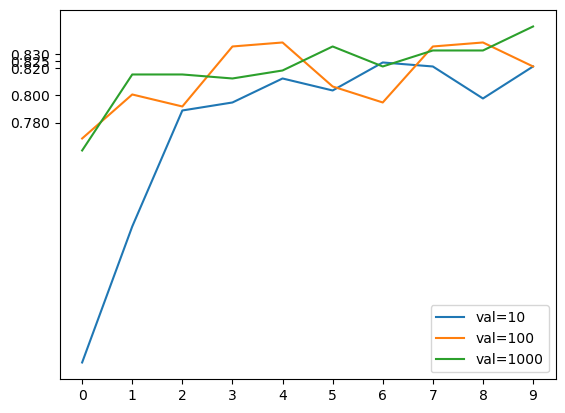

In [71]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [73]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [74]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 15s 133ms/step - loss: 0.9485 - accuracy: 0.6773 - val_loss: 0.6015 - val_accuracy: 0.8006
Epoch 2/30
96/96 [==============================] - 12s 120ms/step - loss: 0.5138 - accuracy: 0.8243 - val_loss: 0.5513 - val_accuracy: 0.8035
Epoch 3/30
96/96 [==============================] - 11s 119ms/step - loss: 0.3469 - accuracy: 0.8895 - val_loss: 0.5466 - val_accuracy: 0.8270
Epoch 4/30
96/96 [==============================] - 12s 120ms/step - loss: 0.2646 - accuracy: 0.9100 - val_loss: 0.5496 - val_accuracy: 0.8065
Epoch 5/30
96/96 [==============================] - 12s 120ms/step - loss: 0.1807 - accuracy: 0.9505 - val_loss: 0.5429 - val_accuracy: 0.8270
Epoch 6/30
96/96 [==============================] - 12s 120ms/step - loss: 0.1318 - accuracy: 0.9674 - val_loss: 0.5672 - val_accuracy: 0.8152
Epoch 7/30
96/96 [==============================] - 11s 118ms/step - loss: 0.0890 - accuracy: 0.9850 - val_loss: 0.5818 - val_accuracy: 0.

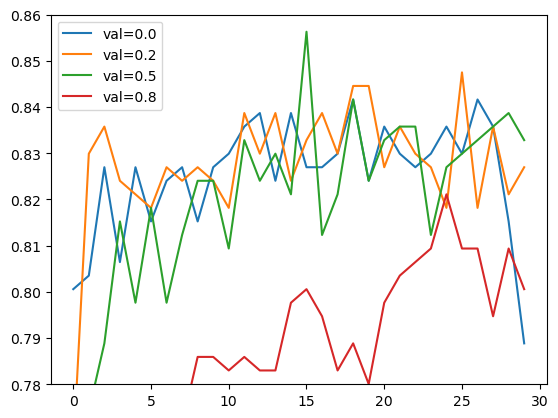

In [75]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

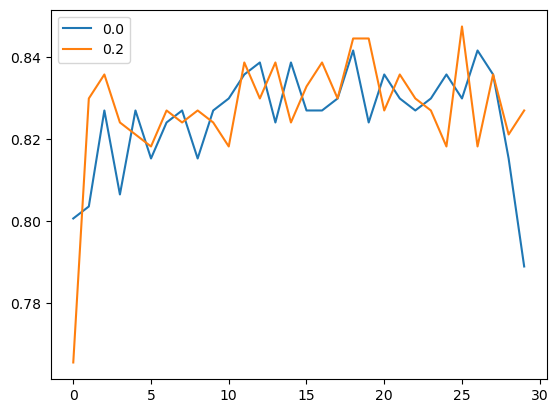

In [78]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [79]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 14s 128ms/step - loss: 1.0470 - accuracy: 0.6450 - val_loss: 0.6907 - val_accuracy: 0.7595
Epoch 2/50
96/96 [==============================] - 11s 119ms/step - loss: 0.6197 - accuracy: 0.7823 - val_loss: 0.6340 - val_accuracy: 0.7977
Epoch 3/50
96/96 [==============================] - 11s 119ms/step - loss: 0.4763 - accuracy: 0.8393 - val_loss: 0.5586 - val_accuracy: 0.8035
Epoch 4/50
88/96 [==========================>...] - ETA: 0s - loss: 0.3655 - accuracy: 0.8697

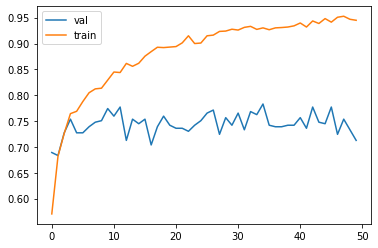

In [12]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [19]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [25]:
input_size = 299

In [38]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [39]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [40]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/50
96/96 [==============================] - 78s 816ms/step - loss: 1.0387 - accuracy: 0.6793 - val_loss: 0.5567 - val_accuracy: 0.8211
Epoch 2/50
96/96 [==============================] - 77s 805ms/step - loss: 0.5472 - accuracy: 0.8214 - val_loss: 0.4331 - val_accuracy: 0.8622
Epoch 3/50
96/96 [==============================] - 74s 772ms/step - loss: 0.4525 - accuracy: 0.8491 - val_loss: 0.4360 - val_accuracy: 0.8504
Epoch 4/50
96/96 [==============================] - 75s 778ms/step - loss: 0.4000 - accuracy: 0.8605 - val_loss: 0.3728 - val_accuracy: 0.8856
Epoch 5/50
96/96 [==============================] - 75s 785ms/step - loss: 0.3586 - accuracy: 0.8853 - val_loss: 0.3832 - val_accuracy: 0.8768
Epoch 6/50
96/96 [==============================] - 75s 777ms/step - loss: 0.3261 - accuracy: 0.8934 - val_loss: 0.3828 - val_accuracy: 0.8827
Epoch 7/50
96/96 [==============================] 

KeyError: 'val_accuracy'

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [3]:
import tensorflow as tf
from tensorflow import keras

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [7]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [11]:
model = keras.models.load_model('xception_v4_1_13_0.903.h5')

In [10]:
model.evaluate(test_ds)

  ...
    to  
  ['...']
12/12 [==============================] - 8s 645ms/step - loss: 0.2939 - accuracy: 0.8978


[0.29389633300403756, 0.89784944]

In [12]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [15]:
img = load_img(path, target_size=(299, 299))

In [16]:
import numpy as np

In [18]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [21]:
X = preprocess_input(X)

In [23]:
pred = model.predict(X)

In [25]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [26]:
dict(zip(classes, pred[0]))

{'dress': -1.4282539,
 'hat': -5.522186,
 'longsleeve': -3.1655293,
 'outwear': -2.201648,
 'pants': 9.294684,
 'shirt': -3.4289198,
 'shoes': -4.2395606,
 'shorts': 3.4339347,
 'skirt': -4.194675,
 't-shirt': -2.9939806}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

